<a href="https://colab.research.google.com/github/zhuppyra/price-forecasting/blob/main/test_arima_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pmdarima

In [2]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import files
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

In [3]:
uploaded = files.upload()

Saving Data harga 2016-2021 10 komoditas.csv to Data harga 2016-2021 10 komoditas.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Data harga 2016-2021 10 komoditas.csv']), index_col='Date', parse_dates=True)
# Dataset is now stored in a Pandas Dataframe
df.index.freq='D'
df.head()

,Shallot,Garlic,Rice,Chili pepper,Cayenne pepper,Broiler meat,Topside beef,Granulated sugar,Cooking oil,Chicken egg
Date,,,,,,,,,,
2016-01-01,35774.0,27588.0,10806.0,39831.0,48486.0,33303.0,110235.0,12838.0,15027.0,25743.0
2016-01-02,35068.0,27750.0,10809.0,40191.0,48146.0,33479.0,110265.0,12909.0,15092.0,25774.0
2016-01-03,35318.0,27728.0,10809.0,39581.0,47396.0,33362.0,110338.0,12909.0,15092.0,25700.0
2016-01-04,35757.0,28084.0,10835.0,39251.0,45896.0,34224.0,110306.0,13017.0,14956.0,25564.0
2016-01-05,36236.0,28037.0,10835.0,39241.0,44021.0,34116.0,110245.0,13020.0,14962.0,25586.0


In [5]:
# checking for missing data
df.isna().any().any()

True

In [6]:
# filling missing data using last observation carried forward (LOCF)
df1 = df.ffill()
# print dataframe shape
print(df1.shape)
# rechecking for missing data
print(df1.isna().any().any())
df1.head

(2192, 10)
False


<bound method NDFrame.head of             Shallot   Garlic     Rice  Chili pepper  Cayenne pepper  \
Date                                                                  
2016-01-01  35774.0  27588.0  10806.0       39831.0         48486.0   
2016-01-02  35068.0  27750.0  10809.0       40191.0         48146.0   
2016-01-03  35318.0  27728.0  10809.0       39581.0         47396.0   
2016-01-04  35757.0  28084.0  10835.0       39251.0         45896.0   
2016-01-05  36236.0  28037.0  10835.0       39241.0         44021.0   
...             ...      ...      ...           ...             ...   
2021-12-27  28420.0  28152.0  10320.0       50881.0         95556.0   
2021-12-28  28117.0  28118.0  10323.0       50516.0         96180.0   
2021-12-29  28054.0  27989.0  10323.0       50118.0         93738.0   
2021-12-30  28553.0  28349.0  10313.0       49103.0         92086.0   
2021-12-31  28462.0  28309.0  10297.0       47906.0         88543.0   

            Broiler meat  Topside beef  Granul

In [7]:
# isolate Shallot
shallot = df1['Shallot']
shallot.head()

Date
2016-01-01    35774.0
2016-01-02    35068.0
2016-01-03    35318.0
2016-01-04    35757.0
2016-01-05    36236.0
Freq: D, Name: Shallot, dtype: float64

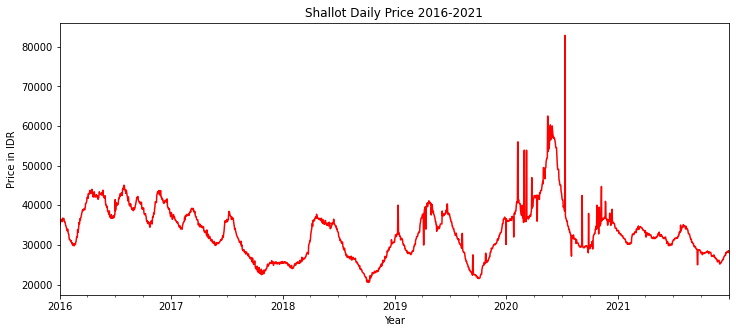

In [25]:
shallot.plot(color='r', figsize=(12,5))
plt.title('Shallot Daily Price 2016-2021')
plt.xlabel('Year')
plt.ylabel('Price in IDR')
plt.show()

In [9]:
def test_stationarity(timeseries,maxlag):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,maxlag=maxlag,
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (round(dfoutput,3))

In [10]:
test_stationarity(shallot, 30)

Results of Dickey-Fuller Test:
Test Statistic                   -3.674
p-value                           0.004
#Lags Used                       22.000
Number of Observations Used    2169.000
Critical Value (1%)              -3.433
Critical Value (5%)              -2.863
Critical Value (10%)             -2.567
dtype: float64


In [11]:
sh_results = adfuller(shallot)
print('Shallot augmented Dicky-Fuller test result:', sh_results)
print('Test statistic Shallot:', sh_results[0])
print('P-value Shallot:', sh_results[1])
print('------')

Shallot augmented Dicky-Fuller test result: (-3.674306435601145, 0.004489420293956338, 22, 2169, {'1%': -3.4333684674663467, '5%': -2.8628734534635902, '10%': -2.5674798640234444}, 38234.595065173635)
Test statistic Shallot: -3.674306435601145
P-value Shallot: 0.004489420293956338
------


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


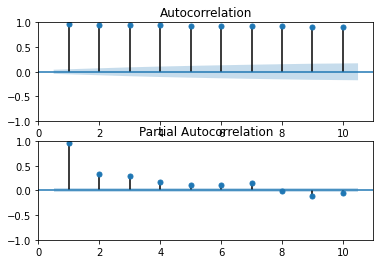

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_acf(shallot, lags=10, zero=False, ax=ax1)
plot_pacf(shallot, lags=10, zero=False, ax=ax2)
plt.show()

In [13]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(shallot)

(0.19143895645849282, True)

In [14]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
arima_model = auto_arima(shallot, d=0, trace=True,
                         suppress_warnings=True)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=38794.895, Time=2.69 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=44822.614, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39322.226, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=42731.382, Time=2.73 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=51960.640, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=38809.858, Time=2.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=38853.165, Time=1.67 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=38794.332, Time=4.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=38814.471, Time=2.73 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=38787.338, Time=3.10 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=38796.894, Time=3.01 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=38786.147, Time=2.73 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=38788.000, Time=3.85 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=38775.965, Time=8.90 sec
 ARIMA(4,0,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2192
Model:               SARIMAX(5, 0, 4)   Log Likelihood              -19349.571
Date:                Mon, 14 Mar 2022   AIC                          38719.142
Time:                        11:11:25   BIC                          38776.068
Sample:                             0   HQIC                         38739.948
                               - 2192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6842      0.027     63.070      0.000       1.632       1.737
ar.L2         -1.4052      0.040    -34.988      0.000      -1.484      -1.327
ar.L3          1.7085      0.038     45.228      0.000       1.634       1.783
ar.L4         -1.2281      0.035    -35.325      0.000      -1.296      -1.160
ar.L5          0.2405      0.018     13.703      0.000       0.206       0.275
ma.L1         -1.2360      0.026    -47.969      0.000      -1.287      -1.186
ma.L2          0.9432      0.028     33.111      0.000       0.887       0.999
ma.L3         -1.2715      0.026    -49.335      0.000      -1.322      -1.221
ma.L4          0.7240      0.018     40.189      0.000       0.689       0.759
sigma2      2.815e+06   7.08e-08   3.98e+13      0.000    2.82e+06    2.82e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           6340516.64
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              21.23   Skew:                             9.45
Prob(H) (two-sided):                  0.00   Kurtosis:                       265.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.63e+28. Standard errors may be unstable.
"""

In [16]:
order_aic_bic=[]
for p in range(4):
      for q in range(4):
          model = SARIMAX(shallot, order=(p,0,q), trend='c')
          results_m = model.fit()
          order_aic_bic.append((p, q, results_m.aic, results_m.bic))

In [17]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])
# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))
# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

    p  q           AIC           BIC
7   1  3  38792.938460  38827.093878
15  3  3  38794.160132  38839.700689
14  3  2  38794.331680  38834.179667
10  2  2  38794.895468  38829.050886
11  2  3  38795.529096  38835.377083
6   1  2  38809.858093  38838.320941
13  3  1  38814.470844  38848.626262
9   2  1  38853.165361  38881.628210
5   1  1  38867.022484  38889.792762
12  3  0  38897.473022  38925.935870
8   2  0  39077.364710  39100.134989
4   1  0  39322.225989  39339.303698
3   0  3  41083.865911  41112.328760
2   0  2  41661.343085  41684.113363
1   0  1  42731.382232  42748.459941
0   0  0  44822.614431  44833.999570
    p  q           AIC           BIC
7   1  3  38792.938460  38827.093878
10  2  2  38794.895468  38829.050886
14  3  2  38794.331680  38834.179667
11  2  3  38795.529096  38835.377083
6   1  2  38809.858093  38838.320941
15  3  3  38794.160132  38839.700689
13  3  1  38814.470844  38848.626262
9   2  1  38853.165361  38881.628210
5   1  1  38867.022484  38889.792762
1

In [18]:
# Fit model
model_2 = SARIMAX(shallot, order=(5,0,4))
results_2 = model_2.fit()
# Calculate the mean absolute error from residuals
# residuals is obtained by using .resid
mae = np.mean(np.abs(results_2.resid))
print(mae)


662.1898746141294


                               SARIMAX Results                                
Dep. Variable:                Shallot   No. Observations:                 2192
Model:               SARIMAX(5, 0, 4)   Log Likelihood              -19349.571
Date:                Mon, 14 Mar 2022   AIC                          38719.142
Time:                        11:12:01   BIC                          38776.068
Sample:                    01-01-2016   HQIC                         38739.948
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6842      0.027     63.070      0.000       1.632       1.737
ar.L2         -1.4052      0.040    -34.988      0.000      -1.484      -1.327
ar.L3          1.7085      0.038     45.228      0.0

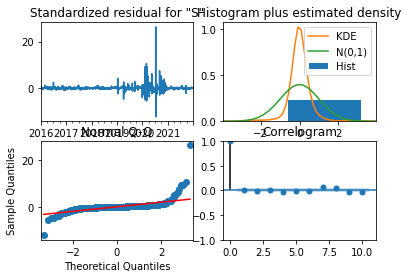

In [19]:
# using residual test statistic to decide whether
# a model is a good fit to a time series
# Create and fit model
model1 = SARIMAX(shallot, order=(5,0,4))
results1 = model1.fit()
# Print summary
print(results1.summary())
# it returns a set of values including Prob(Q) and Prob(JB)
# using 4 diagnostic plots to evaluate the model
# Create and fit model
model = SARIMAX(shallot, order=(5,0,4))
results=model.fit()
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()